<a href="https://colab.research.google.com/github/geonextgis/End-to-End-Deep-Learning/blob/main/01_ANN/02_Problem_with_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem with Perceptron**
The perceptron is a basic type of artificial neural network used in machine learning and deep learning. It is a simple model that can be used for binary classification tasks.

**Limitations:**<br>

* **Limited to Linear Relationships:** Perceptrons can only model linear relationships between input features and the output. They cannot capture non-linear patterns in the data.

* **Inability to Solve Non-Linear Problems:** If your data is not linearly separable, a perceptron will not be able to learn and make accurate predictions.

* **Lack of Complexity:** Perceptrons cannot represent complex functions or understand intricate data patterns, making them unsuitable for tasks that require higher-level abstractions.

* **Poor for Image and Text Data:** In tasks involving images, text, or other high-dimensional data, perceptrons may struggle because these data types often contain non-linear structures.

* **Limited Feature Interaction:** Perceptrons treat features independently and do not capture interactions between them, which is a key limitation for many real-world problems.

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron

import warnings
warnings.filterwarnings("ignore")

## **Make the DataFrames**

In [2]:
or_dict = {"input1": [1, 1, 0, 0],
           "input2": [1, 0, 1, 0],
           "output": [1, 1, 1, 0]}

and_dict = {"input1": [1, 1, 0, 0],
            "input2": [1, 0, 1, 0],
            "output": [1, 0, 0, 0]}

xor_dict = {"input1": [1, 1, 0, 0],
            "input2": [1, 0, 1, 0],
            "output": [0, 1, 1, 0]}

In [3]:
or_data = pd.DataFrame(data=or_dict)
and_data = pd.DataFrame(data=and_dict)
xor_data = pd.DataFrame(data=xor_dict)

In [4]:
print("OR DataFrame:")
or_data

OR DataFrame:


,input1,input2,output
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


In [5]:
print("AND DataFrame:")
and_data

AND DataFrame:


,input1,input2,output
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


In [6]:
print("XOR DataFrame:")
xor_data

XOR DataFrame:


,input1,input2,output
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


## **Plot the DataFrames**

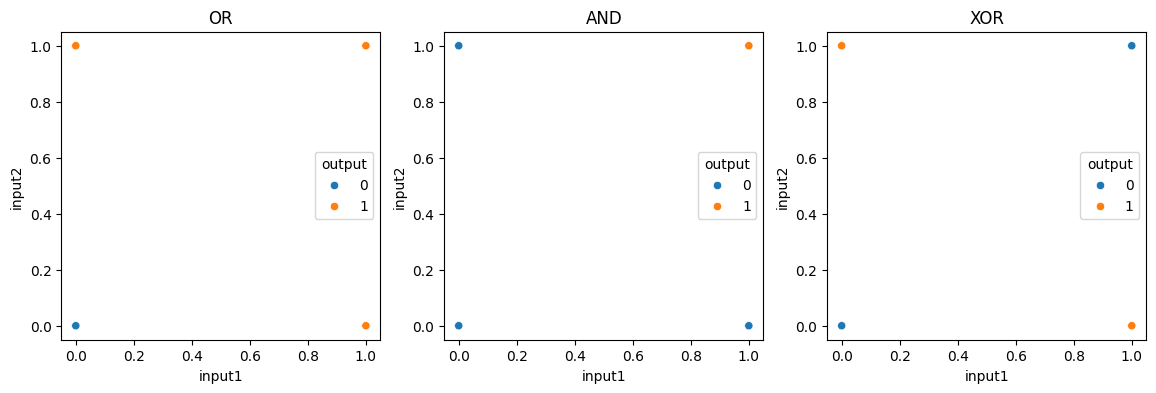

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 4))
axes = axes.flatten()

dataframes = [or_data, and_data, xor_data]
plot_titles = ["OR", "AND", "XOR"]

for i in range(len(dataframes)):
    data = dataframes[i]
    sns.scatterplot(x=data["input1"], y=data["input2"], hue=data["output"], ax=axes[i])
    axes[i].set_title(plot_titles[i])

## **Train Perceptron Models**

In [8]:
# Instantiate 3 different classifiers for 3 datasets
or_clf = Perceptron()
and_clf = Perceptron()
xor_clf = Perceptron()

In [9]:
# Fit the data
or_clf.fit(or_data.iloc[:, :2], or_data.iloc[:, -1])

Perceptron()

In [10]:
and_clf.fit(and_data.iloc[:, :2], and_data.iloc[:, -1])

Perceptron()

In [11]:
xor_clf.fit(xor_data.iloc[:, :2], xor_data.iloc[:, -1])

Perceptron()

## **Check the Coefficients and Intercept**

In [12]:
print("Coeffients (OR Classifier):", or_clf.coef_)
print("Coeffients (AND Classifier):", and_clf.coef_)
print("Coeffients (XOR Classifier):", xor_clf.coef_)

Coeffients (OR Classifier): [[2. 2.]]
Coeffients (AND Classifier): [[2. 2.]]
Coeffients (XOR Classifier): [[0. 0.]]


In [13]:
print("Intercept (OR Classifier):", or_clf.intercept_)
print("Intercept (AND Classifier):", and_clf.intercept_)
print("Intercept (XOR Classifier):", xor_clf.intercept_)

Intercept (OR Classifier): [-1.]
Intercept (AND Classifier): [-2.]
Intercept (XOR Classifier): [0.]


## **Plot the Decision Boundaries of the Models**

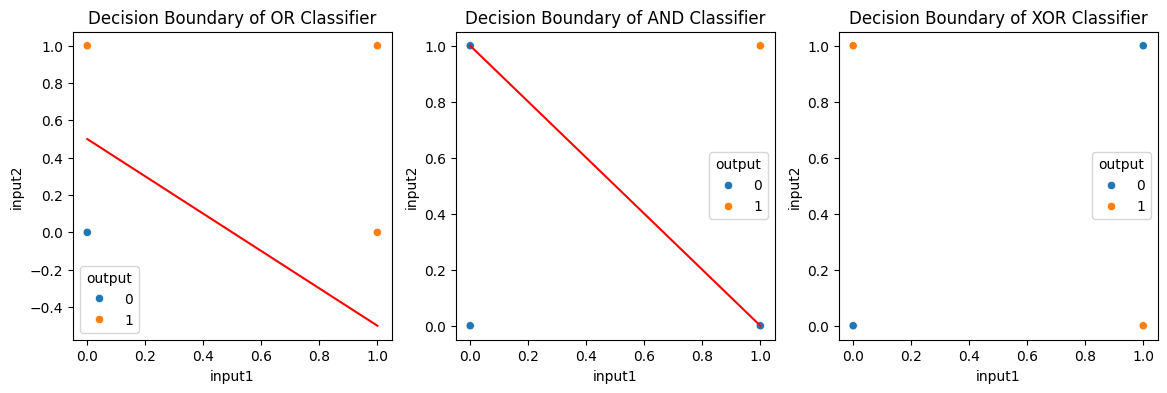

In [14]:
classifiers = [or_clf, and_clf, xor_clf]

fig, axes = plt.subplots(ncols=3, figsize=(14, 4))
axes = axes.flatten()

for index, clf in enumerate(classifiers):
    data = dataframes[index]
    slope = clf.coef_.flatten()[0] / clf.coef_.flatten()[1]
    intercept = clf.intercept_[0] / clf.coef_.flatten()[1]

    X = np.linspace(0, 1, 5)
    y = -X * slope - intercept

    # sns.lineplot(x, y, ax=axes[index])
    axes[index].plot(X, y, color="red")
    sns.scatterplot(x=data["input1"], y=data["input2"], hue=data["output"], ax=axes[index])
    axes[index].set_title(f"Decision Boundary of {plot_titles[index]} Classifier")